In [1]:
import os

import numpy as np
import pandas as pd; pd.set_option('display.max_columns', None); pd.set_option('display.max_colwidth', 250)
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

# Set the backend to render inline with no transparency
%matplotlib inline
plt.rcParams['savefig.transparent'] = False  # Ensure no transparency in saved figures
plt.rcParams['figure.facecolor'] = 'white'   # Set the figure background to white
plt.rcParams['axes.facecolor'] = 'white'     # Set the axes background to white

# set the seaborn plotting_context("talk", font_scale=1.5)
sns.set_context("talk", font_scale=1.1)

# Data

In [2]:
PATH = 'data'
FILE = 'data_fig1.csv'

df_combined = pd.read_csv(os.path.join(PATH, FILE))
df_combined.head(3)

,subject_order,timespan_months,sessions_per_month,number_of_sessions,session_id,date_only,days_diff
0,pALS 52,0.700000,1.428571,2,03cd72ae-fbf6-484b-9d86-09f7230726bf__2023-09-27,2023-09-27,21
1,pALS 31,7.733333,3.399015,24,095b55de-6600-4d17-b8e6-387a7ef9db6f__2023-03-14,2023-03-14,6
2,pALS 31,7.733333,3.399015,24,095b55de-6600-4d17-b8e6-387a7ef9db6f__2023-03-21,2023-03-21,7


# Figure

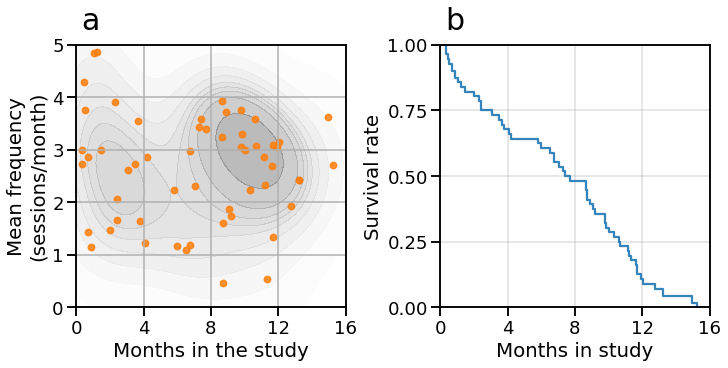

In [3]:
fig, axs = plt.subplots(1,2, figsize=(10, 5), layout='constrained')

#################################
# Panel A: KDE y scatterplot
df_tmp = df_combined.drop_duplicates('subject_order')
x = df_tmp['timespan_months']
y = df_tmp['sessions_per_month']

####################################################
# Panel A
ax = axs[0]
sns.kdeplot(x=x, y=y, cmap="Greys", shade=True, bw_adjust=.8, alpha=.3, ax=ax)
ax.scatter(x,
           y, 
           color = sns.color_palette()[1],
           s = 40, 
           alpha=0.85,
           label = 'Patients')

# add marginals like a joint plot
ax.grid(False)
ax.set_xlim([0,16])
ax.set_ylim([0,5])
ax.set_xticks(np.linspace(0, 16, 5, endpoint=True))
# ax.set_yticks(np.linspace(0, 5, 5, endpoint=True))
ax.set_xlabel('Months in the study')
# ax.set_ylabel('Mean frequency (1/month)')
ax.set_ylabel('Mean frequency\n(sessions/month)')
ax.grid()

####################################################
# Panel B
# ax = axs[1]
# sns.histplot(df_freq.query('timespan_months > 0')['days_diff'], 
#              bins=np.arange(0, 31, 1)+0.5, 
#              color=sns.color_palette()[0], 
#              ax=ax)
# ax.set_xlabel('Inter-session interval (days)')
# ax.set_ylabel('Number of Sessions')
# ax.set_xticks(np.arange(0, 31, 7))
# ax.grid(True, alpha=0.4)
# ax.set_xlim([0,30])

####################################################
# Panel C
ax = axs[1]
df_cum = df_tmp.copy()
df_cum = df_cum.groupby('subject_order').first()
df_cum = df_cum.sort_values(by='timespan_months')
# df_cum['proportion'] = (df_cum['timespan_months'].rank(method='average') / len(df_cum))
# Calculate reversed proportion
df_cum['proportion'] = 1 - ((df_cum['timespan_months'].rank(method='average') -1) / (len(df_cum)-1))

# Plot the reversed cumulative proportion
sns.lineplot(x=df_cum['timespan_months'], 
             y=df_cum['proportion'], 
             color=sns.color_palette()[0],
             drawstyle='steps-post',
             alpha=0.9,
             ax=ax)

ax.set_xlabel('Months in study')
ax.set_ylabel('Survival rate')
ax.grid(True, alpha=0.4)
ax.set_xlim(0, 16)
ax.set_xticks([0, 4, 8, 12, 16])
ax.set_ylim(0, 1)
ax.set_yticks([0, 0.25, 0.5, 0.75, 1])
# ax.set_yticklabels([0, 25, 50, 75, 100])
# ax.avline

# Add letters dynamically based on axis limits
for ax, letter in zip(axs, 'ab'):
    ax.text(0.02, 1.09, letter, fontsize=30, va='center', ha='left', transform=ax.transAxes)

plt.show()